# python-matplotlib 泰坦尼克号数据的分析及可视化（圆饼图、直方图、箱型图、柱状图， seaborn柱状图、小提琴图，常用函数）

## 数据集来自kaggle平台：Titanic - Machine Learning from Disaster | Kaggle​www.kaggle.com/c/titanic/overview
## ---------------------------------------------
## 姓名：张露雨
## 学号：519130910018
## ---------------------------------------------
## 作业要求（满分100分）：
## 1.替换脚本出现的（请填写）的部分，并运行出对应结果；
## 2.在“请分析当前图展示的结论”处对图片进行数据分析。
***
 

## Step1. 数据导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
# 导入时间模块

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串,中文不显

# 读取数据
train_data = pd.read_csv('Titanic_Data.csv')

## Step2. 查看数据信息

In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.info() # 查看缺失列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step3. 数据清洗-数据预处理
### <span style='color:Red'> 此处需要填空（10分） </span>

In [4]:
# (1)年龄（Age）使用平均值填充
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

# (2)船票价格（Fare）使用平均值填充
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())   #票价本来应该就是全的，貌似这句话没有用
#（请填写，10分，运行时注释本行）

# (3)客舱号cabin使用U未知填充
train_data['Cabin'] = train_data['Cabin'].fillna('U')

#print(pd.value_counts(full['Embarked']))  # 词频统计,登船港口最常见的类别为‘S’，914人
# （4）登船港口Embarked使用最常见的类的‘S’填充
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# 查看处理后的结果
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step4. x=live占比\dead占比 matplotlib圆饼图 展示整体存活率和死亡率

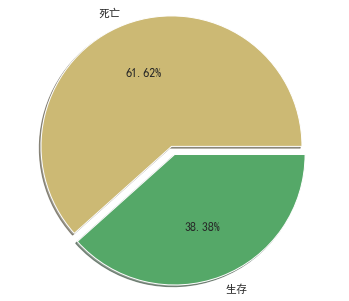

In [5]:
sns.set()
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei') # 解决Seaborn中文显示问题

cad_draw1 = train_data['Survived'].value_counts()
plt.axis('equal')
plt.pie(cad_draw1,
       explode = [0.1,0],
       labels = ['死亡','生存'],
       colors=['y', 'g'],
       autopct='%.2f%%',
       pctdistance=0.6,
       labeldistance = 1.1,
       shadow = True,
       startangle=0,
       radius=1.5,
       frame=False)
n = 1
plt.savefig('存活圆饼图_%d.png' % n, dpi=200)

## Step5. x=性别，y=live占比 Seaborn柱状图 展示男性和女性存活情况
### <span style='color:Red'> 此处2处需要填空（20分） </span>

女性存活率为74.20%，男性存活率为18.89%


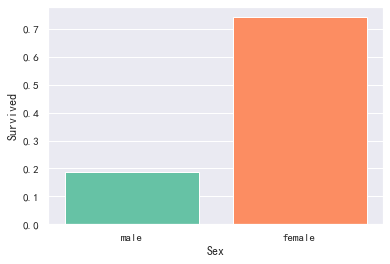

In [6]:
# 男性和女性存活情况
cad_draw2 = train_data[['Sex','Survived']].groupby(['Sex']).mean().reset_index()
sns.barplot(x="Sex", y="Survived", 
            data=cad_draw2,
            palette = 'Set2', 
            order = ['male','female'],  # 筛选类别
            capsize = 0.05,  # 误差线横向延伸宽度
            saturation=1,   # 颜色饱和度
            errcolor = 'gray',errwidth = 2,  # 误差线颜色，宽度
            ci = 'sd'    # 置信区间误差 → 0-100内值、'sd'、None
            )

a=cad_draw2.loc[0,'Survived']*100
#print(a)
#（请填写，10分，计算女性存活率，运行时注释本行，直接写数字只得一半分）
b=cad_draw2.loc[1,'Survived']*100
#（请填写，10分，计算男性存活率，运行时注释本行，直接写数字只得一半分）

print('女性存活率为%.2f%%，男性存活率为%.2f%%' %  (a,b))

## Step6. x=客舱等级(Pclass)，y=live占比 seaborn柱状图 展示客舱等级和存活率的关系
### <span style='color:Red'> 此处需要填空（10分） </span>

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64
一等客舱存活率为62.96%，二等存活率为47.28%，三等存活率为24.24%


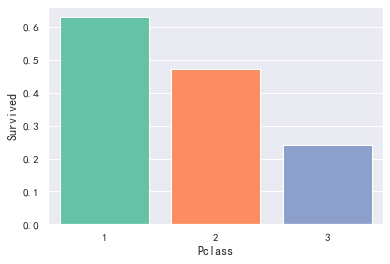

In [7]:
cad_draw3 = train_data[['Pclass','Survived']].groupby(['Pclass']).mean().reset_index()
#（请填写，筛选出绘制下图所需数据，运行时注释本行, 10分）
sns.barplot(x="Pclass", y="Survived", 
            data=cad_draw3,
            palette = 'Set2', 
            capsize = 0.05,  # 误差线横向延伸宽度
            saturation=1,   # 颜色饱和度
            errcolor = 'gray',errwidth = 2,  # 误差线颜色，宽度
            ci = 'sd'    # 置信区间误差 → 0-100内值、'sd'、None
            )

survive_Pclass = train_data.groupby(['Pclass','Survived'])['Survived'].count()
print(survive_Pclass)
# 一等客舱生存率较高

print('一等客舱存活率为%.2f%%，二等存活率为%.2f%%，三等存活率为%.2f%%' % 
     (survive_Pclass.loc[1,1]/survive_Pclass.loc[1].sum()*100, 
      survive_Pclass.loc[2,1]/survive_Pclass.loc[2].sum()*100,
      survive_Pclass.loc[3,1]/survive_Pclass.loc[3].sum()*100))

## Step7. x=客舱等级，y=live占比 seaborn柱状图 展示客舱等级与不同性别存活率的关系
### <span style='color:Red'> 此处2处需要填空（20分） </span>

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

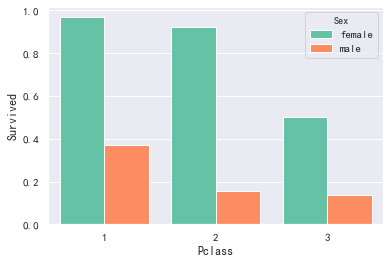

In [8]:
cad_draw5 = train_data.groupby(['Sex','Pclass']).mean()['Survived'].reset_index()
#（请填写，筛选出绘制下图所需数据，10分）
sns.barplot(x="Pclass", y="Survived", hue='Sex',
            #（请填写，根据下图补全分组条形图的依据属性，运行时注释本行，10分）
            data=cad_draw5,
            palette = 'Set2', 
#            order = ['male','female'],  # 筛选类别
            capsize = 0.05,  # 误差线横向延伸宽度
            saturation=1,   # 颜色饱和度
            errcolor = 'gray',errwidth = 2,  # 误差线颜色，宽度
#            ci = 'sd'    # 置信区间误差 → 0-100内值、'sd'、None
            )

## Step8. x=年龄 matplotlib直方图，箱型图 展示年龄分布

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

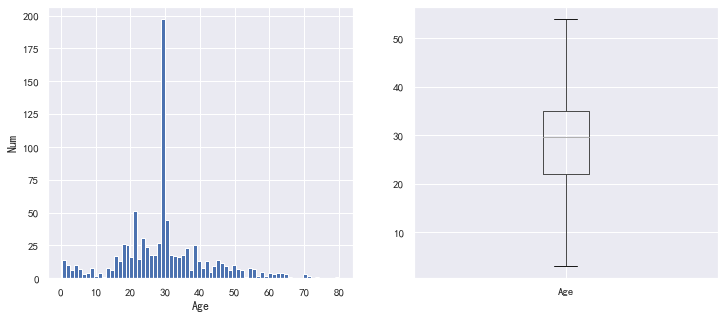

In [9]:
#年龄直方图
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

#年龄箱型图
plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)

train_data['Age'].describe()

## Step9. x=年龄，y=live占比 seaborn柱状图 展示不同年龄存活率的分布
### <span style='color:Red'> 此处需要填空（10分） </span>

<AxesSubplot:xlabel='Age_int', ylabel='Survived'>

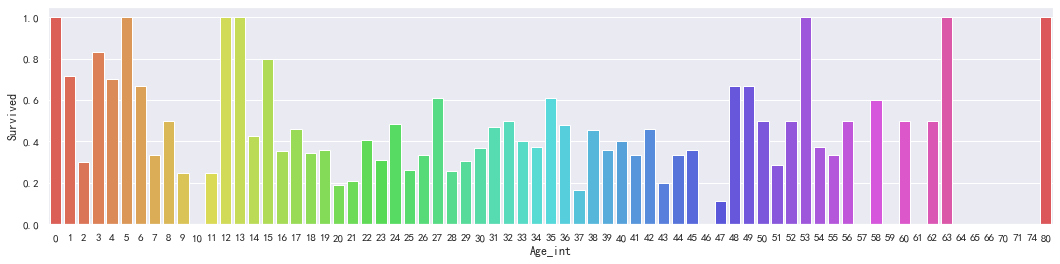

In [10]:
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()

plt.figure(figsize=(18,4))
sns.barplot(x="Age_int", y="Survived", 
#（请填写，根据下图补全绘图函数、x参数和y参数，运行时注释本行，10分） 
#            hue="class", 
            data=average_age,
            palette = 'hls', 
#            palette = ['r','g'], 
#            order = ['male','female'],  # 筛选类别
            capsize = 0.05,  # 误差线横向延伸宽度
            saturation=1,   # 颜色饱和度
#            errcolor = 'gray',errwidth = 2,  # 误差线颜色，宽度
#            ci = 'sd'    # 置信区间误差 → 0-100内值、'sd'、None
            )

## Step10. x=船样等级（dead或live），y=年龄 seaborn小提琴图 展示船舱等级、性别与存活率的关系
### <span style='color:Red'> 此处需要填空（10分） </span>

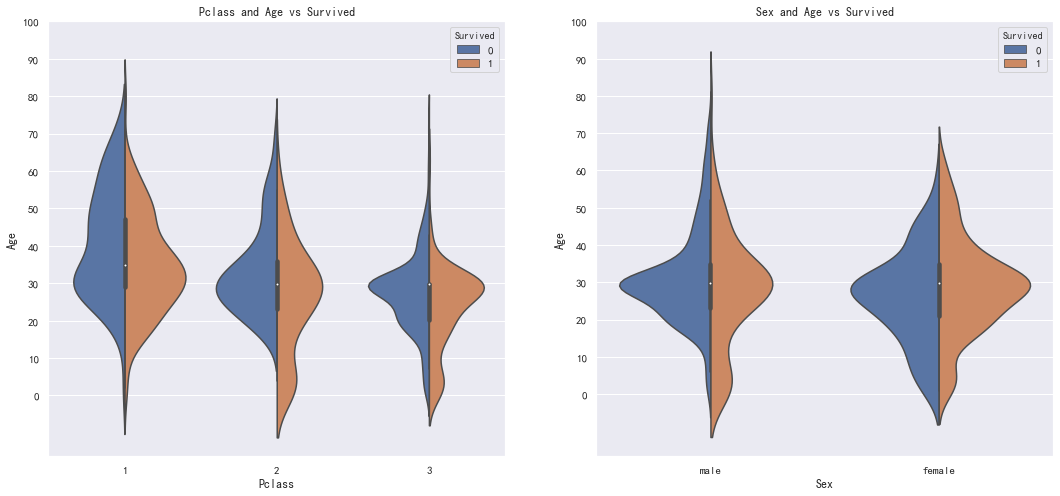

In [11]:
fig,ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

# 按照不同船舱等级划分：船舱等级越高，存活者年龄越大，船舱等级1存活年龄集中在20-40岁，船舱等级2/3中有较多低龄乘客存活
#（请填写，按照不同性别划分时得出的结论，运行时注释本行，10分）
# 按照不同性别划分：男性女性存活者年龄主要分布在20-40岁，且均有较多低龄乘客，其中女性存活更多

### Step11. 展示有无同乘父母/子女/兄弟姐妹与存活率的关系
### x=有同乘的兄弟姐妹、配偶live占比\dead占比 matplotlib圆饼图
### x=无同乘的兄弟姐妹、配偶live占比\dead占比 matplotlib圆饼图
### x=有同乘的父母/小孩 live占比\dead占比 matplotlib圆饼图
### x=无同乘的父母/小孩live占比\dead占比 matplotlib圆饼图

Text(0.5, 0, 'no_parch')

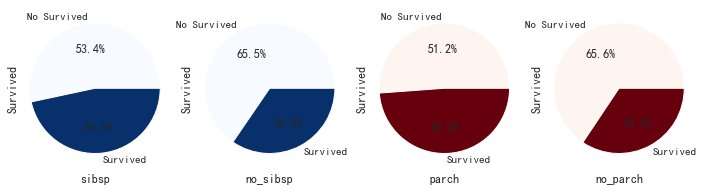

In [12]:
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]
# 筛选出有无兄弟姐妹数据

parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]
# 筛选出有无父母子女数据

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('sibsp')
 
plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('no_sibsp')

plt.subplot(143)  
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.1f%%',colormap = 'Reds')  
plt.xlabel('parch')  
 
plt.subplot(144)  
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%',colormap = 'Reds')  
plt.xlabel('no_parch')

# 有兄弟姐妹、父母子女的乘客存活率更大

## Step12. 展示同乘人数与存活率的关系
### x=同乘的兄弟姐妹/配偶数， y=live占比 matplotlib柱状图
### x=同乘的父母/小孩数， y=live占比 matplotlib柱状图
### x=同乘的兄弟姐妹/配偶/父母/小孩数，y=live占比 matplotlib柱状图
### <span style='color:Red'> 此处需要填空（10分） </span>

若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低


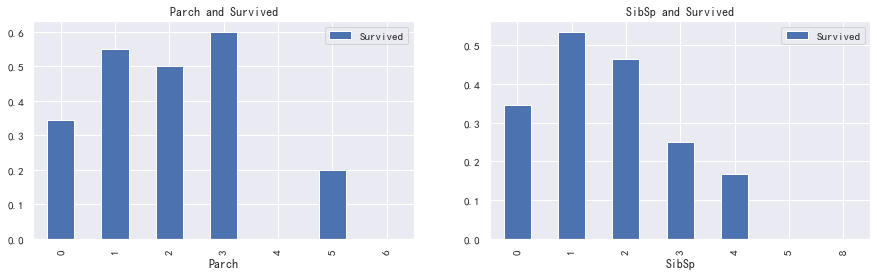

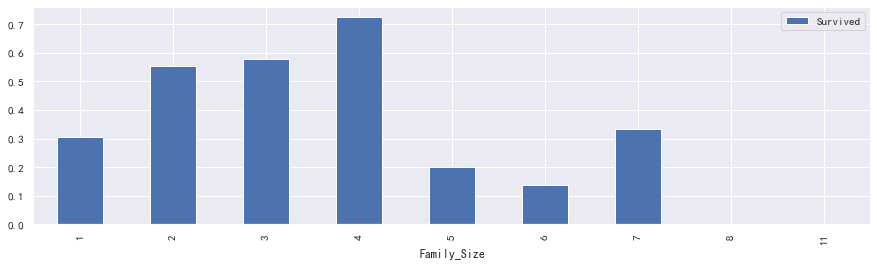

In [13]:
fig, ax=plt.subplots(1,2,figsize=(15,4))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')
# 查看兄弟姐妹个数与存活率

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar(figsize = (15,4))
# 查看父母子女个数与存活率

#（请填写，根据图片结果进行数据分析，运行时注释本行，10分）
# 分析结果：若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低
print("若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低")

## Step13. 展示票价与存活率的关系
### x=票价 matplotlib 直方图，matplotlib箱型图
### x=dead/live ,y=平均票价 matplotlib柱状图
### <span style='color:Red'> 此处需要填空（10分） </span>

生还者的平均票价要大于未生还者的平均票价


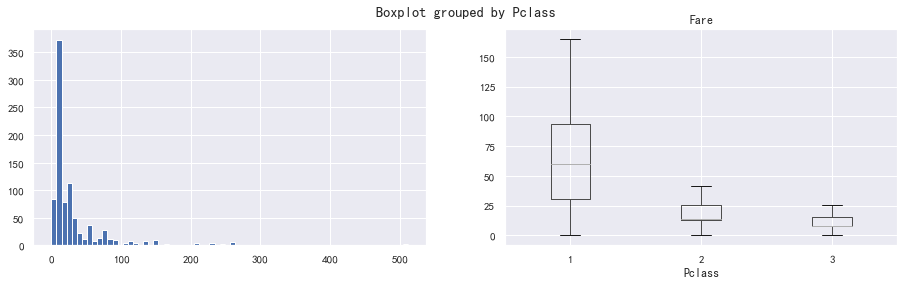

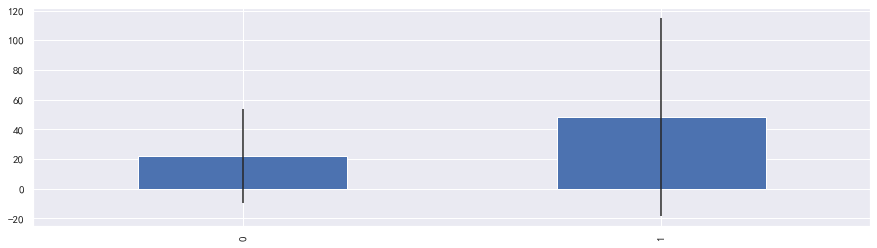

In [14]:
# 票价分布和存活与否的关系

fig, ax=plt.subplots(1,2,figsize=(15,4))
train_data['Fare'].hist(bins=70, ax = ax[0])
train_data.boxplot(column='Fare', by='Pclass', showfliers=False,ax = ax[1])
# 查看票价分布情况

fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
# 基于票价，筛选出生存与否的数据
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False,figsize = (15,4),grid = True)
# 查看票价与是否生还的关系

#（请填写，根据图片结果进行数据分析，运行时注释本行，10分）
# 分析结果：生还者的平均票价要大于未生还者的平均票价
print('生还者的平均票价要大于未生还者的平均票价')